#**Feature Engineering**

Feature engineering is a process of transforming the given data into a form which is easier to interpret. Here, we are interested in making it more transparent for a machine learning model, but some features can be generated so that the data visualization prepared for people without a data-related background can be more digestible. However, the concept of transparency for the machine learning models is a complicated thing as different models often require different approaches for the different kinds of data.

* Imputation
* Handling Outliers
* Binning
* Log Transform
* One-Hot Encoding 
* Grouping Operations
* Feature Split
* Scaling
* Extracting Date

##**1-Missing Values -> Imputation**

Missing values are one of the most common problems you can encounter when you try to prepare your data for machine learning. The reason for the missing values might be human errors, interruptions in the data flow, privacy concerns, and so on. Whatever is the reason, missing values affect the performance of the machine learning models.

***Numerical Imputation***

Imputation is a more preferable option rather than dropping because it preserves the data size. However, there is an important selection of what you impute to the missing values. I suggest beginning with considering a possible default value of missing values in the column. For example, if you have a column that only has 1 and NA, then it is likely that the NA rows correspond to 0. For another example, if you have a column that shows the “customer visit count in last month”, the missing values might be replaced with 0 as long as you think it is a sensible solution. 

Except for the case of having a default value for missing values, I think the best imputation way is to use the medians of the columns. As the averages of the columns are sensitive to the outlier values, while medians are more solid in this respect.

***Categorical Imputation***

Replacing the missing values with the maximum occurred value in a column is a good option for handling categorical columns. But if you think the values in the column are distributed uniformly and there is not a dominant value, imputing a category like “Other” might be more sensible, because in such a case, your imputation is likely to converge a random selection.

 ***An Extension To Imputation***

Imputation is the standard approach, and it usually works well. However, imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.
In this approach, we impute the missing values, as before. And, additionally, for each column with missing entries in the original dataset, we add a new column that shows the location of the imputed entries.

In [ ]:
# NUMERICAL NAN

#Filling all missing values with 0
data = data.fillna(0)

#Filling missing values with medians of the columns
data = data.fillna(data.median())

In [ ]:
# CATEGORICAL NAN

#Max fill function for categorical columns
data['column_name'].fillna(data['column_name'].value_counts()
.idxmax(), inplace=True)

In [ ]:
SimpleImputer(strategy='most_frequent')

In [ ]:
# An Extension To Imputation
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean',add_indicator=True)
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
SimpleImputer()
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))

[[ 7.   2.   3.   0. ]
 [ 4.   3.5  6.   1. ]
 [10.   3.5  9.   1. ]]


##**2-Outliers**

Before mentioning how outliers can be handled, I want to state that the best way to detect the outliers is to demonstrate the data visually. All other statistical methodologies are open to making mistakes, whereas visualizing the outliers gives a chance to take a decision with high precision. Anyway, I am planning to focus visualization deeply in another article and let’s continue with statistical methodologies.

Statistical methodologies are less precise as I mentioned, but on the other hand, they have a superiority, they are fast. Here I will list two different ways of handling outliers. These will detect them using standard deviation, and percentiles.

***Outlier Detection with Standard Deviation***

If a value has a distance to the average higher than x * standard deviation, it can be assumed as an outlier. Then what x should be?
There is no trivial solution for x, but usually, a value between 2 and 4 seems practical.

In addition, z-score can be used instead of the formula above. Z-score (or standard score) standardizes the distance between a value and the mean using the standard deviation.

***Outlier Detection with Percentiles***

Another mathematical method to detect outliers is to use percentiles. You can assume a certain percent of the value from the top or the bottom as an outlier. The key point is here to set the percentage value once again, and this depends on the distribution of your data as mentioned earlier.
Additionally, a common mistake is using the percentiles according to the range of the data. In other words, if your data ranges from 0 to 100, your top 5% is not the values between 96 and 100. Top 5% means here the values that are out of the 95th percentile of data.

***An Outlier Dilemma: Drop or Cap***

Another option for handling outliers is to cap them instead of dropping. So you can keep your data size and at the end of the day, it might be better for the final model performance.
On the other hand, capping can affect the distribution of the data, thus it better not to exaggerate it.

In [ ]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = data['column'].mean () + data['column'].std () * factor
lower_lim = data['column'].mean () - data['column'].std () * factor

data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]

In [ ]:
#Dropping the outlier rows with Percentiles
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quantile(.05)

data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]

In [ ]:
#Capping the outlier rows with Percentiles
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quantile(.05)
data.loc[(df[column] > upper_lim),column] = upper_lim
data.loc[(df[column] < lower_lim),column] = lower_lim

##**3-Smoothing/Binning**

Binning method is used to smoothing data or to handle noisy data. In this method, the data is first sorted and then the sorted values are distributed into a number of buckets or bins. As binning methods consult the neighborhood of values, they perform local smoothing.
* Sort the array of given data set.
* Divides the range into N intervals, each containing the approximately same number of samples(Equal-depth partitioning).
* Store mean/ median/ boundaries in each row.

The main motivation of binning is to make the model more robust and prevent overfitting, however, it has a cost to the performance. Every time you bin something, you sacrifice information and make your data more regularized. (Please see regularization in machine learning)
The trade-off between performance and overfitting is the key point of the binning process. In my opinion, for numerical columns, except for some obvious overfitting cases, binning might be redundant for some kind of algorithms, due to its effect on model performance.
However, for categorical columns, the labels with low frequencies probably affect the robustness of statistical models negatively. Thus, assigning a general category to these less frequent values helps to keep the robustness of the model. For example, if your data size is 100,000 rows, it might be a good option to unite the labels with a count less than 100 to a new category like “Other”.

In [ ]:
#Numerical Binning Example
data['bin'] = pd.cut(data['value'], bins=[0,30,70,100], labels=["Low", "Mid", "High"])

In [ ]:
#Categorical Binning Example
conditions = [
data['Country'].str.contains('Spain'),
data['Country'].str.contains('Italy'),
data['Country'].str.contains('Chile'),
data['Country'].str.contains('Brazil')]

choices = ['Europe', 'Europe', 'South America', 'South America']

data['Continent'] = np.select(conditions, choices, default='Other')

##**4-Log Transformation**

Logarithm transformation (or log transform) is one of the most commonly used mathematical transformations in feature engineering. 

***What are the benefits of log transform:***

* It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.
* In most of the cases the magnitude order of the data changes within the range of the data. For instance, the difference between ages 15 and 20 is not equal to the ages 65 and 70. In terms of years, yes, they are identical, but for all other aspects, 5 years of difference in young ages mean a higher magnitude difference. This type of data comes from a multiplicative process and log transform normalizes the magnitude differences like that.
* It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.

***A critical note:*** The data you apply log transform must have only positive values, otherwise you receive an error. Also, you can add 1 to your data before transform it. Thus, you ensure the output of the transformation to be positive.

Log(x+1)

In [ ]:
#Log Transform Example
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data['log+1'] = (data['value']+1).transform(np.log)

#Negative Values Handling
#Note that the values are different
data['log'] = (data['value']-data['value'].min()+1) .transform(np.log)

##**5-Categorical Features**

A categorical variable takes only a limited number of values.

Three Approaches

* ***Drop Categorical Variables***

The easiest approach to dealing with categorical variables is to simply remove them from the dataset. This approach will only work well if the columns did not contain useful information.

* ***Label Encoding***

Label encoding assigns each unique value to a different integer.
This approach assumes an ordering of the categories.
Not all categorical variables have a clear ordering in the values, but we refer to those that do as ordinal variables. For tree-based models (like decision trees and random forests), you can expect label encoding to work well with ordinal variables.

* ***One-Hot Encoding***

One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data.

One-hot encoding is one of the most common encoding methods in machine learning. This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them. These binary values express the relationship between grouped and encoded column.
This method changes your categorical data, which is challenging to understand for algorithms, to a numerical format and enables you to group your categorical data without losing any information.

***Why One-Hot?:*** If you have N distinct values in the column, it is enough to map them to N-1 binary columns, because the missing value can be deducted from other columns. If all the columns in our hand are equal to 0, the missing value must be equal to 1. This is the reason why it is called as one-hot encoding. However, I will give an example using the get_dummies function of Pandas. This function maps all values in a column to multiple columns.

In [ ]:
encoded_columns = pd.get_dummies(data['column'])
data = data.join(encoded_columns).drop('column', axis=1)

In [ ]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

In [ ]:
# One-Hot Encoding

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

##**6-Gouping**

The key point of group by operations is to decide the aggregation functions of the features. For numerical features, average and sum functions are usually convenient options, whereas for categorical features it more complicated.

***Categorical Column Grouping***

I suggest three different ways for aggregating categorical columns:
* The first option is to select the label with the highest frequency. In other words, this is the max operation for categorical columns, but ordinary max functions generally do not return this value, you need to use a lambda function for this purpose.
* Second option is to make a pivot table. This approach resembles the encoding method in the preceding step with a difference. Instead of binary notation, it can be defined as aggregated functions for the values between grouped and encoded columns. This would be a good option if you aim to go beyond binary flag columns and merge multiple features into aggregated features, which are more informative.
* Last categorical grouping option is to apply a group by function after applying one-hot encoding. This method preserves all the data -in the first option you lose some-, and in addition, you transform the encoded column from categorical to numerical in the meantime. 

***Numerical Column Grouping***

Numerical columns are grouped using sum and mean functions in most of the cases. Both can be preferable according to the meaning of the feature. For example, if you want to obtain ratio columns, you can use the average of binary columns. In the same example, sum function can be used to obtain the total count either.

In [ ]:
# Grouping Based on Highest Frequency
data.groupby('id').agg(lambda x: x.value_counts().index[0])

In [ ]:
#Pivot table Pandas Example
data.pivot_table(index='column_to_group', columns='column_to_encode', values='aggregation_column', aggfunc=np.sum, fill_value = 0)

In [ ]:
# Numerical Column Grouping

#sum_cols: List of columns to sum
#mean_cols: List of columns to average
grouped = data.groupby('column_to_group')

sums = grouped[sum_cols].sum().add_suffix('_sum')
avgs = grouped[mean_cols].mean().add_suffix('_avg')

new_df = pd.concat([sums, avgs], axis=1)

##**7-Split**

Splitting features is a good way to make them useful in terms of machine learning. Most of the time the dataset contains string columns that violates tidy data principles. By extracting the utilizable parts of a column into new features:
* We enable machine learning algorithms to comprehend them.
* Make possible to bin and group them.
* Improve model performance by uncovering potential information.

Split function is a good option, however, there is no one way of splitting features. It depends on the characteristics of the column, how to split it. Let’s introduce it with two examples. First, a simple split function for an ordinary name column:

In [ ]:
data.name

#Extracting first names
data.name.str.split(" ").map(lambda x: x[0])

#Extracting last names
data.name.str.split(" ").map(lambda x: x[-1])

#String extraction example
data.title.head()
data.title.str.split("(", n=1, expand=True)[1].str.split(")", n=1, expand=True)[0]

##**8-Scaling**

In most cases, the numerical features of the dataset do not have a certain range and they differ from each other. In real life, it is nonsense to expect age and income columns to have the same range. But from the machine learning point of view, how these two columns can be compared?
Scaling solves this problem. The continuous features become identical in terms of the range, after a scaling process. This process is not mandatory for many algorithms, but it might be still nice to apply. However, the algorithms based on distance calculations such as k-NN or k-Means need to have scaled continuous features as model input.

Basically, there are two common ways of scaling:

***Normalization***

Normalization (or min-max normalization) scale all values in a fixed range between 0 and 1. This transformation does not change the distribution of the feature and due to the decreased standard deviations, the effects of the outliers increases. Therefore, before normalization, it is recommended to handle the outliers.

***Standardization***

Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.
In the following formula of standardization, the mean is shown as μ and the standard deviation is shown as σ.


In [ ]:
# Normalization
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})

data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())

NameError: ignored

In [ ]:
# Standardization
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})

data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()

##**9-Dates**

Though date columns usually provide valuable information about the model target, they are neglected as an input or used nonsensically for the machine learning algorithms. It might be the reason for this, that dates can be present in numerous formats, which make it hard to understand by algorithms, even they are simplified to a format like "01–01–2017".
Building an ordinal relationship between the values is very challenging for a machine learning algorithm if you leave the date columns without manipulation. 
Here, I suggest three types of preprocessing for dates:

* Extracting the parts of the date into different columns: Year, month, day, etc.
* Extracting the time period between the current date and columns in terms of years, months, days, etc.
*Extracting some specific features from the date: Name of the weekday, Weekend or not, holiday or not, etc.

If you transform the date column into the extracted columns like above, the information of them become disclosed and machine learning algorithms can easily understand them.

In [ ]:
import pandas as pd
from datetime import date

data = pd.DataFrame({'date':
['01-01-2017',
'04-12-2008',
'23-06-1988',
'25-08-1999',
'20-02-1993',
]})

#Transform string to date
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

#Extracting Year
data['year'] = data['date'].dt.year

#Extracting Month
data['month'] = data['date'].dt.month

#Extracting passed years since the date
data['passed_years'] = date.today().year - data['date'].dt.year

#Extracting passed months since the date
data['passed_months'] = (date.today().year - data['date'].dt.year) * 12 + date.today().month - data['date'].dt.month

#Extracting the weekday name of the date
data['day_name'] = data['date'].dt.day_name()
data

,date,year,month,passed_years,passed_months,day_name
0,2017-01-01,2017,1,4,48,Sunday
1,2008-12-04,2008,12,13,145,Thursday
2,1988-06-23,1988,6,33,391,Thursday
3,1999-08-25,1999,8,22,257,Wednesday
4,1993-02-20,1993,2,28,335,Saturday


##**10-Feature Selection**

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.

***Irrelevant or partially relevant features can negatively impact model performance.Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.***

Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

***How to select features and what are Benefits of performing feature selection before modeling your data?***

* **Reduces Overfitting:** Less redundant data means less opportunity to make decisions based on noise.
* **Improves Accuracy:** Less misleading data means modeling accuracy improves.
* **Reduces Training Time:** fewer data points reduce algorithm complexity and algorithms train faster.

In [ ]:
# Using selectKbest

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
X.shape

X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape


(1797, 20)

In [ ]:
# Using SelectfromModel

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I select a suitable alpha (equivalent of penalty). The bigger the 
# alpha the less features that will be selected. Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
model.fit(X, y)
model.get_support()

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True])

##**11-Imbalanced DataSet**

Imbalanced datasets are a special case for classification problem where the class distribution is not uniform among the classes. Typically, they are composed by two classes: The majority (negative) class and the minority (positive) class

Imbalanced datasets can be found for different use cases in various domains:

* **Finance:** Fraud detection datasets commonly have a fraud rate of ~1–2%
* **Ad Serving:** Click prediction datasets also don’t have a high clickthrough rate.
* **Transportation/Airline:** Will Airplane failure occur?
* **Medical:** Does a patient has cancer?
* **Content moderation:** Does a post contain NSFW content?

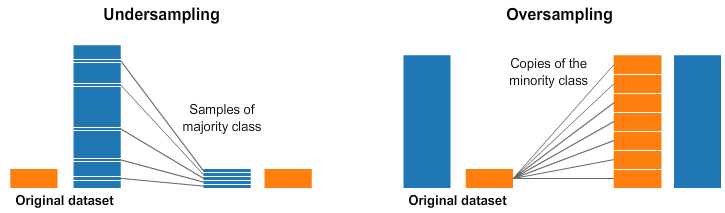

***Undersampling using Tomek Links:***
 
One of such methods it provides is called Tomek Links. Tomek links are pairs of examples of opposite classes in close vicinity.

In this algorithm, we end up removing the majority element from the Tomek link, which provides a better decision boundary for a classifier.

***Oversampling using SMOTE:***
 
In SMOTE (Synthetic Minority Oversampling Technique) we synthesize elements for the minority class, in the vicinity of already existing elements.


* Random resampling provides a naive technique for rebalancing the class distribution for an imbalanced dataset.
* Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.
* Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

***Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.***

Importantly, the change to the class distribution is only applied to the training dataset. The intent is to influence the fit of the models. The resampling is not applied to the test or holdout dataset used to evaluate the performance of a model.

In [ ]:
# UnderSampling

from imblearn.under_sampling import TomekLinks
tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)


In [ ]:
# DownSampling

from imblearn.under_sampling import NearMiss

# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(X,Y)

In [ ]:
# OverSampling
# INCREASE SAMPLE

from imblearn.combine import SMOTETomek
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)
# OR
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(ratio=0.5)
# This would ensure that the minority class was oversampled to have half the number of examples as the majority 
# class, for binary classification problems. This means that if the majority class had 1,000 examples and the 
# minority class had 100, the transformed dataset would have 500 examples of the minority class.
X_train_res, y_train_res = os.fit_sample(X, Y)